In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [18]:
table_file_append = "../data/smooth_comparison_output_rank6.csv"
table_file = "../data/smooth_comparison_output_rank4.csv"

In [19]:
comparison_table = pd.read_csv(table_file)
comparison_table.tail()

,N,window,model,err_inf,err_2,err_fro,model_MSE,true_MSE
4795,4000,156,3,0.001259,1.303976,1.305219,0.040532,0.041044
4796,4000,157,3,0.001248,1.298738,1.300026,0.039505,0.039894
4797,4000,158,3,0.001246,1.291818,1.293072,0.039139,0.039508
4798,4000,159,3,0.001221,1.273052,1.274340,0.040085,0.040349
4799,4000,160,3,0.001203,1.249885,1.251202,0.040657,0.040920


In [20]:
append_table = pd.read_csv(table_file_append)
append_table.tail()

,N,window,model,err_inf,err_2,err_fro,model_MSE,true_MSE
4795,4000,156,3,0.001293,1.021531,1.022492,0.040099,0.041044
4796,4000,157,3,0.001257,0.990213,0.991269,0.039281,0.039894
4797,4000,158,3,0.001265,1.007178,1.008136,0.038797,0.039508
4798,4000,159,3,0.001207,0.966917,0.967889,0.040014,0.040349
4799,4000,160,3,0.001170,0.962547,0.963584,0.040408,0.040920


In [21]:
to_append = append_table[append_table.model != 1]
to_append.loc[:, "model"] = to_append.loc[:, "model"] + 5
comparison_table = comparison_table.append(to_append)

/home/harri267/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [22]:
comparison_table.tail()

,N,window,model,err_inf,err_2,err_fro,model_MSE,true_MSE
4795,4000,156,8,0.001293,1.021531,1.022492,0.040099,0.041044
4796,4000,157,8,0.001257,0.990213,0.991269,0.039281,0.039894
4797,4000,158,8,0.001265,1.007178,1.008136,0.038797,0.039508
4798,4000,159,8,0.001207,0.966917,0.967889,0.040014,0.040349
4799,4000,160,8,0.001170,0.962547,0.963584,0.040408,0.040920


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


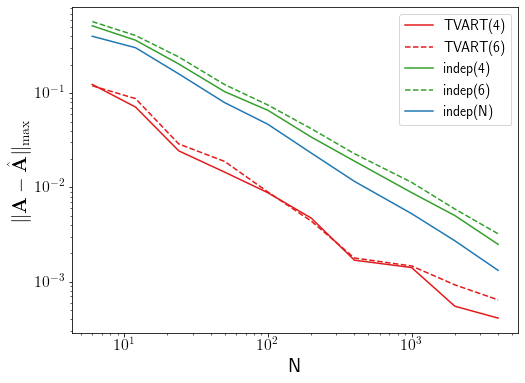

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


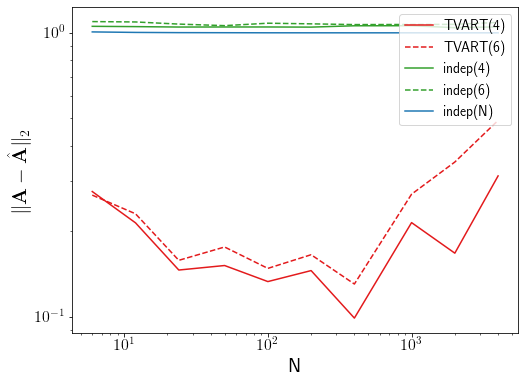

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


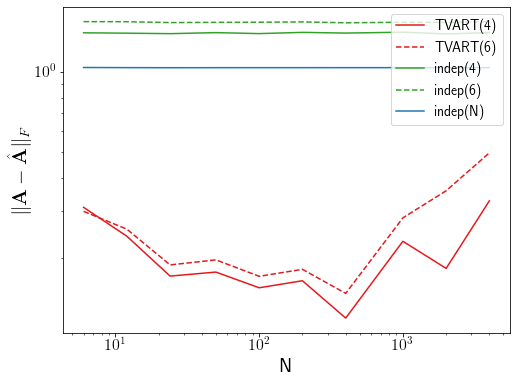

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


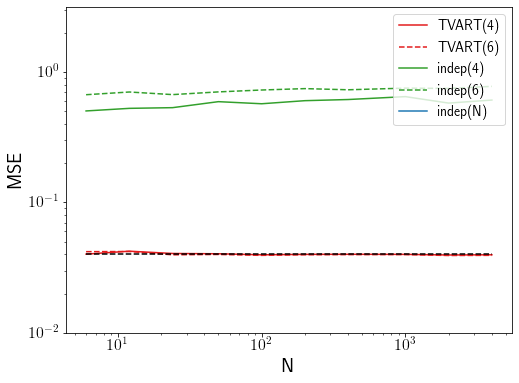

In [27]:
data = comparison_table.copy()
data['model'].replace({1: 'indep(N)', 2: 'indep(4)', 3: 'TVART(4)',
                       4: 'SLDS(4)', 5: 'SLDS(6)', 7: 'indep(6)', 8: 'TVART(6)'}, inplace=True)


import matplotlib
import seaborn as sns

#sns.set()

rgb_values = sns.color_palette("Paired")

plt.rc('text', usetex=True)
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
matplotlib.rcParams.update({'font.size': 16})

#plt.loglog(data['N'], data['err_2'])

for plot_type in ['err_inf', 'err_2', 'err_fro', 'model_MSE']:
    fig, ax = plt.subplots(figsize=(8,6))
    for key, grp in data.sort_values('model').groupby(['model']):
        grp = grp.groupby(['N']).mean()
        skip_plot = False
        if key == 'indep(N)':
            style = '-'
            color = rgb_values[1]
        elif key == 'indep(4)':
            style = '-'
            color = rgb_values[3]
        elif key == 'TVART(4)':
            style = '-'
            color = rgb_values[5]
        elif key == 'SLDS(4)':
            style = '-'
            color = rgb_values[7]
        elif key == 'SLDS(6)':
            style = '--'
            color = rgb_values[7]
        elif key == 'indep(6)':
            style = '--'
            color = rgb_values[3]
        elif key == 'TVART(6)':
            style = '--'
            color = rgb_values[5]
        else:
            skip_plot = True
        if not skip_plot:
            ax = grp.plot(ax=ax, kind='line', y=plot_type, label=key, logx=True, logy=True,
                         style=style, color=color)
    plt.legend(loc='upper right', fontsize=14)
    plt.xlabel('N', fontsize=20)
    if plot_type == 'err_inf':
        plt.ylabel("$\| \mathbf{A} - \hat{\mathbf{A}} \|_\mathrm{max}$", fontsize=20)
    elif plot_type == 'err_2':
        plt.ylabel("$\| \mathbf{A} - \hat{\mathbf{A}} \|_{2}$", fontsize=20)
    elif plot_type == 'err_fro':
        plt.ylabel("$\| \mathbf{A} - \hat{\mathbf{A}} \|_F$", fontsize=20)
    elif plot_type == 'model_MSE':
        plt.ylabel("MSE", fontsize=20)
        plt.plot([min(grp.index), max(grp.index)], [0.2**2, 0.2**2], 'k--')
        plt.ylim([10**-2, 10**0.5])
    #plt.xlim([10, 4*10**3])
    plt.savefig("../figures/smooth_compare_" + plot_type + ".eps")
    plt.show()
    #plt.close()